# Lab1

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [13]:
# Conjunto A
mean = [3, 3]
cov = [[1, 0], [0, 1]]
a = np.random.multivariate_normal(mean, cov, 500).T

# Conjunto B
mean = [-3, -3]
cov = [[2, 0], [0, 5]]
b = np.random.multivariate_normal(mean, cov, 500).T

# Combinação dos dois conjuntos
c = np.concatenate((a, b), axis=1)
c = c.T
np.random.shuffle(c)
c = c.T

# Separação em coordenadas x e y
x = c[0]
y = c[1]

with open("pontos.txt", "w") as f:
    f.write("X\tY\n")  # cabeçalho opcional
    for i in range(c.shape[1]):
        f.write(f"{c[0,i]:.4f} , {c[1,i]:.4f}\n")

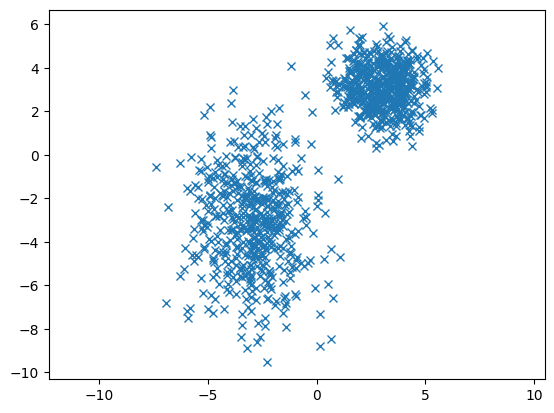

In [14]:
plt.plot( x ,y,"x")
plt.axis("equal" )
plt.show()

## Exercício 1

### 1), 2) e 3)

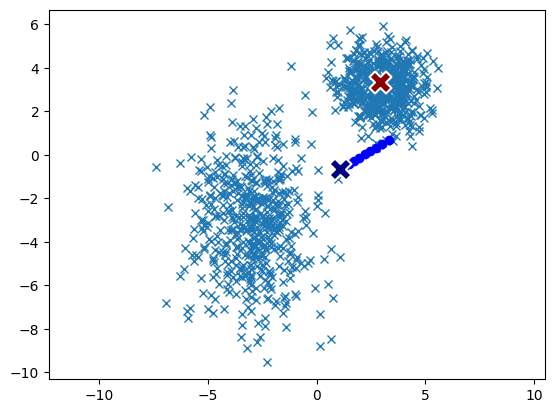

Coordenadas finais:
r1 = [2.90616757 3.34201404]
r2 = [ 1.06964865 -0.67092195]


In [15]:
r1_rand = random.randint(0, len(c[0]) - 1)
r2_rand = random.randint(0, len(c[0]) - 1)

# Inicializar centroides aleatórios
i1 = random.randint(0, len(c[0]) - 1)
i2 = random.randint(0, len(c[0]) - 1)
aux1 = [c[0][i1], c[1][i1]]
aux2 = [c[0][i2], c[1][i2]]

# compara a soma das coordenadas (x + y)
if aux1[0] + aux1[1] > aux2[0] + aux2[1]:
    r1 = aux1  # o ponto mais "à esquerda"
    r2 = aux2  # o ponto mais "à direita"
else:
    r1 = aux2
    r2 = aux1

alfa = 10e-5
epocas = 10

#para guardar a evolução dos centroides
r1_historic = []
r2_historic = []
for epoca in range(epocas):#10 epocas
    for i in range(len(c[0])):
        
        dist1 = np.sqrt(pow(c[0][i] - r1[0], 2) + pow(c[1][i] - r1[1], 2))
        dist2 = np.sqrt(pow(c[0][i] - r2[0], 2) + pow(c[1][i] - r2[1], 2))

        if dist1 < dist2:
            r1[0] = (1-alfa)*r1[0]+alfa*c[0][i]
            r1[1] = (1-alfa)*r1[1]+alfa*c[1][i]
        else:
            r2[0] = (1-alfa)*r2[0]+alfa*c[0][i]
            r2[1] = (1-alfa)*r2[1]+alfa*c[1][i]
    
    r1_historic.append(r1.copy())
    r2_historic.append(r2.copy())

x = c[0]
y = c[1]
plt.plot( x ,y,"x")
plt.axis("equal" )

r1_historic = np.array(r1_historic)
r2_historic = np.array(r2_historic)

# Trajetória dos centroides
plt.plot(r1_historic[:, 0], r1_historic[:, 1], 'r-o', label='Trajetória r1')
plt.plot(r2_historic[:, 0], r2_historic[:, 1], 'b-o', label='Trajetória r2')
plt.scatter(r1_historic[-1, 0], r1_historic[-1, 1],
            color='darkred', marker='X', s=250, edgecolor='white',
            linewidth=1.5, label='r1 final', zorder=5)
plt.scatter(r2_historic[-1, 0], r2_historic[-1, 1],
            color='navy', marker='X', s=250, edgecolor='white',
            linewidth=1.5, label='r2 final', zorder=5)
plt.show()

print("Coordenadas finais:")
print("r1 =", r1_historic[-1])
print("r2 =", r2_historic[-1])



Ao alterar o valor de α e o número de épocas, nota-se que ambos influenciam diretamente na forma como os centroides se movem.
Quando α é maior o deslocamento dos centroides é bastante mais rapido. Já com valores de α muito pequenos, o movimento é mais lento e gradual, exigindo mais épocas até atingir a convergência.
Um número de épocas pequeno resulta nos centroides não terem tempo suficiente para fazer uma boa convergencia. Com mais épocas, acabam por se aproximar dos centros reais dos grupos de pontos.
No final, observa-se que os valores de r₁ e r₂ convergem para as médias dos conjuntos usados, mostrando que o algoritmo consegue identificar corretamente o centro de cada distribuição.

### 4) e 5)

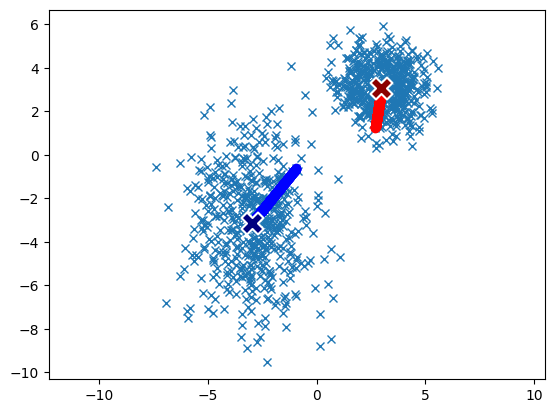

Coordenadas finais:
r1 = [2.97834857 3.09210366]
r2 = [-2.97571316 -3.13919327]


In [16]:
alfa2 = 10e-3
num_epocas = 1000
n = len(c[0])

# Inicializar centroides aleatórios
i1 = random.randint(0, len(c[0]) - 1)
i2 = random.randint(0, len(c[0]) - 1)
aux1 = [c[0][i1], c[1][i1]]
aux2 = [c[0][i2], c[1][i2]]

# Compara a soma das coordenadas (x + y)
if aux1[0] + aux1[1] > aux2[0] + aux2[1]:
    r1 = aux1  # o ponto mais "à esquerda"
    r2 = aux2  # o ponto mais "à direita"
else:
    r1 = aux2
    r2 = aux1

# Histórico
r1_historic = []
r2_historic = []


for epoca in range(num_epocas):
    d1 = [0, 0]  
    d2 = [0, 0] 

    for i in range(n):
       
        dist1 = np.sqrt(pow(c[0][i] - r1[0], 2) + pow(c[1][i] - r1[1], 2))
        dist2 = np.sqrt(pow(c[0][i] - r2[0], 2) + pow(c[1][i] - r2[1], 2))
        #para termos os efeitos cumulativos fazemos a diferença entre o ponto e o centroide mais proximo para no fim da epoca atualizarmos o centroide  
        if dist1 < dist2:
            d1[0] += (c[0][i] - r1[0])
            d1[1] += (c[1][i] - r1[1])
        else:
            d2[0] += (c[0][i] - r2[0])
            d2[1] += (c[1][i] - r2[1])

    # Atualiza os centroides apenas no fim da época
    r1[0] += (alfa2 / n) * d1[0]
    r1[1] += (alfa2 / n) * d1[1]
    r2[0] += (alfa2 / n) * d2[0]
    r2[1] += (alfa2 / n) * d2[1]

   
    r1_historic.append(r1.copy())
    r2_historic.append(r2.copy())

# Plot final
x = c[0]
y = c[1]
plt.plot(x, y, "x")
plt.axis("equal")

r1_historic = np.array(r1_historic)
r2_historic = np.array(r2_historic)

# Trajetórias (um ponto por época)
plt.plot(r1_historic[:, 0], r1_historic[:, 1], 'r-o', label='r1')
plt.plot(r2_historic[:, 0], r2_historic[:, 1], 'b-o', label='r2')

# Pontos finais
plt.scatter(r1_historic[-1, 0], r1_historic[-1, 1],
            color='darkred', marker='X', s=250, edgecolor='white',
            linewidth=1.5, label='r1 final', zorder=5)
plt.scatter(r2_historic[-1, 0], r2_historic[-1, 1],
            color='navy', marker='X', s=250, edgecolor='white',
            linewidth=1.5, label='r2 final', zorder=5)

plt.show()

print("Coordenadas finais:")
print("r1 =", r1_historic[-1])
print("r2 =", r2_historic[-1])

Observa-se que, neste método, os representantes (r₁ e r₂) movem-se de forma mais gradual e com menos variações bruscas do que no exercício 1.
O percurso até aos centros dos grupos parece mais direto, no entanto sao necessarias mais epocas para estabilizar (utilizando os mesmo parametro na simulaçao)

### 6)

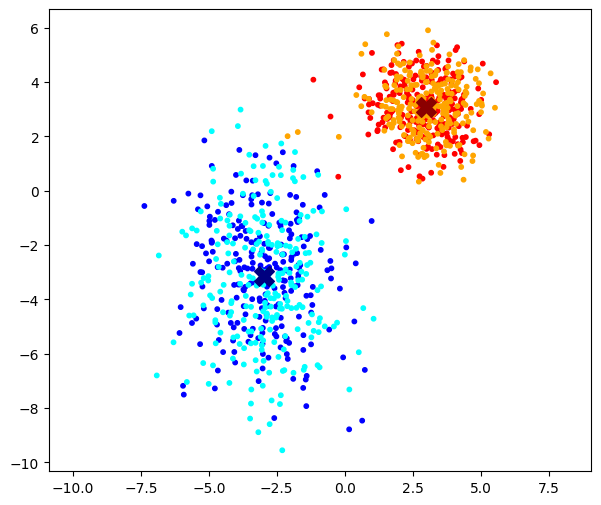

In [17]:
colors = []  # lista de cores

for i in range(len(c[0])):
    dist1 = np.sqrt(pow(c[0][i] - r1[0], 2) + pow(c[1][i] - r1[1], 2))
    dist2 = np.sqrt(pow(c[0][i] - r2[0], 2) + pow(c[1][i] - r2[1], 2))

    #Primeiros 500 pontos conjunto A 
    if i < 500:
        etiqueta = 1
    else:
        etiqueta = 2

    # Decidir a cor com base na proximidade e na etiqueta original
    if dist1 < dist2 and etiqueta == 1:
        colors.append("red")       # pontos de A próximos de r1
    elif dist1 < dist2 and etiqueta == 2:
        colors.append("orange")    # pontos de B próximos de r1
    elif dist2 <= dist1 and etiqueta == 1:
        colors.append("blue")      # pontos de A próximos de r2
    else:
        colors.append("cyan")      # pontos de B próximos de r2

# Plot final
plt.figure(figsize=(7,6))
plt.scatter(c[0], c[1], c=colors, s=10)
plt.scatter(r1[0], r1[1], color='darkred', marker='X', s=200, label='r1')
plt.scatter(r2[0], r2[1], color='navy', marker='X', s=200, label='r2')
plt.axis('equal')
plt.show()


Deu errado porque os dados estavam a ser shuffled e estava a resultando neste gráfico muito estranho

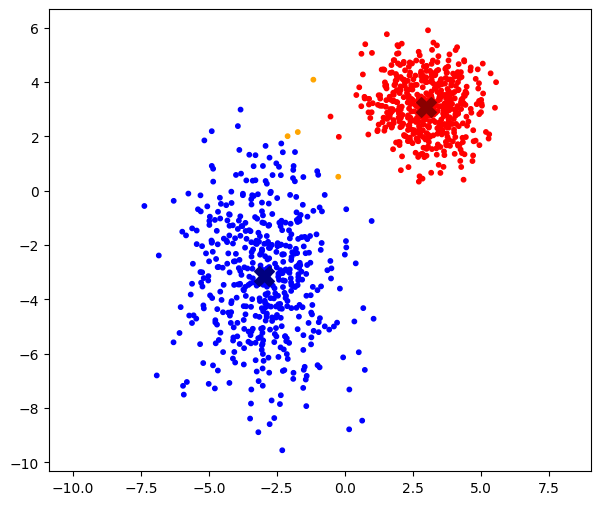

In [18]:
# Combinação dos dois conjuntos
c = np.concatenate((a, b), axis=1)
c = c.T
#np.random.shuffle(c)
c = c.T
colors = []  # lista de cores

for i in range(len(c[0])):
    dist1 = np.sqrt(pow(c[0][i] - r1[0], 2) + pow(c[1][i] - r1[1], 2))
    dist2 = np.sqrt(pow(c[0][i] - r2[0], 2) + pow(c[1][i] - r2[1], 2))

    #Primeiros 500 pontos conjunto A 
    if i < 500:
        etiqueta = 1
    else:
        etiqueta = 2

    # Decidir a cor com base na proximidade e na etiqueta original
    if dist1 < dist2 and etiqueta == 1:
        colors.append("red")       # pontos de A próximos de r1
    elif dist1 < dist2 and etiqueta == 2:
        colors.append("orange")    # pontos de B próximos de r1
    elif dist2 <= dist1 and etiqueta == 1:
        colors.append("cyan")      # pontos de A próximos de r2
    else:
        colors.append("blue")      # pontos de B próximos de r2

# Plot final
plt.figure(figsize=(7,6))
plt.scatter(c[0], c[1], c=colors, s=10)
plt.scatter(r1[0], r1[1], color='darkred', marker='X', s=200, label='r1')
plt.scatter(r2[0], r2[1], color='navy', marker='X', s=200, label='r2')
plt.axis('equal')
plt.show()

Assim os resultados fazem muito mais sentido! É possível verificar que o erro é bastante baixo, sendo os pontos mal determinados estão muito próximos de ambos os grupos.

### 7)

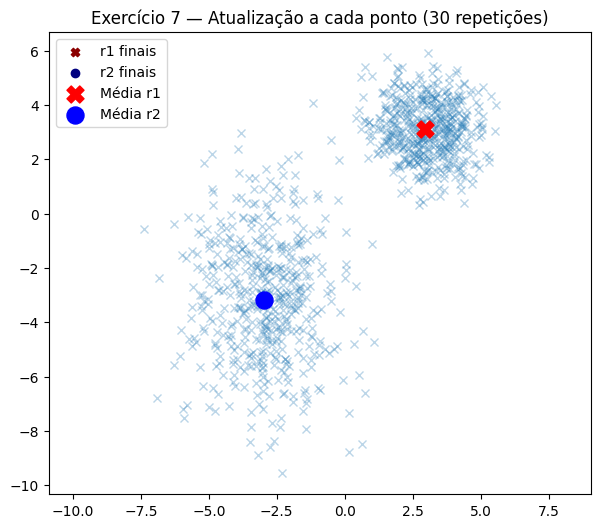

In [19]:
alfa = 1e-3
num_epocas = 50
n = len(c[0])

# posições finais de r1 e r2 após 30 repetições
r1_finais = []
r2_finais = []

for repeticao in range(30):
    # Inicializar centroides aleatórios
    i1 = random.randint(0, len(c[0]) - 1)
    i2 = random.randint(0, len(c[0]) - 1)
    aux1 = [c[0][i1], c[1][i1]]
    aux2 = [c[0][i2], c[1][i2]]

    # compara a soma das coordenadas (x + y)
    if aux1[0] + aux1[1] > aux2[0] + aux2[1]:
        r1 = aux1  # o ponto mais "à esquerda"
        r2 = aux2  # o ponto mais "à direita"
    else:
        r1 = aux2
        r2 = aux1

    # Atualização "online" (a cada ponto)
    for epoca in range(num_epocas):
        for i in range(n):
            dist1 = np.sqrt(pow(c[0][i] - r1[0], 2) + pow(c[1][i] - r1[1], 2))
            dist2 = np.sqrt(pow(c[0][i] - r2[0], 2) + pow(c[1][i] - r2[1], 2))

            if dist1 < dist2:
                r1[0] = (1 - alfa) * r1[0] + alfa * c[0][i]
                r1[1] = (1 - alfa) * r1[1] + alfa * c[1][i]
            else:
                r2[0] = (1 - alfa) * r2[0] + alfa * c[0][i]
                r2[1] = (1 - alfa) * r2[1] + alfa * c[1][i]

    # Guardar as posições finais
    r1_finais.append(r1.copy())
    r2_finais.append(r2.copy())

# Converter para arrays para facilitar o plot
r1_finais = np.array(r1_finais)
r2_finais = np.array(r2_finais)

# Graph
plt.figure(figsize=(7,6))
plt.plot(c[0], c[1], "x", alpha=0.3)
plt.scatter(r1_finais[:,0], r1_finais[:,1], color='darkred', marker='X', label='r1 finais')
plt.scatter(r2_finais[:,0], r2_finais[:,1], color='navy', marker='o', label='r2 finais')
plt.scatter(np.mean(r1_finais[:,0]), np.mean(r1_finais[:,1]), color='red', marker='X', s=150, zorder=2, label='Média r1')
plt.scatter(np.mean(r2_finais[:,0]), np.mean(r2_finais[:,1]), color='blue', marker='o', s=150, zorder=3, label='Média r2')
plt.axis("equal")
plt.legend()
plt.title("Exercício 7 — Atualização a cada ponto (30 repetições)")
plt.show()


Podemos obervar no grafico acima que com um alfa e um numero de epocas relativamente baixo temos os centroides finais muito dispersos como ja foi analisado no exercicio 1. Aumentando estes parametros para termos uma melhor convergencia observamos o seguinte plot presente na foto do ponto 7(30 repetiçoes).
Foi ainda realizado um teste com 1000 repetiçoes e como seria de esperar a media dos centroides ficou muito perto uma da outra, a tendencia para infinito seria que eles ficassem um em cima do outro ja que probabilisticamente 50% das vezes o r1 pode ir para um cluster ou para o outro!(na versao antiga que fizemos)

No codigo acima fizemos com que o centroide r2 fosse para a esquerda e r1 para a direita fazendo com que a média coincida com os centroides finais. Se diminuir-mos os alfa ou o numero de epocas a tendencia é que a media varie um pouco em torno das medias dos conjuntos.

## Exercício 2

In [20]:
# Conjunto A
mean = [3, 3]
cov = [[1, 0], [0, 1]]
a = np.random.multivariate_normal(mean, cov, 250).T

# Conjunto B
mean = [-3, -3]
cov = [[2, 0], [0, 5]]
b = np.random.multivariate_normal(mean, cov, 250).T

# Combinação dos dois conjuntos
c = np.concatenate((a, b), axis=1)
c = c.T
np.random.shuffle(c)
c = c.T


In [21]:
pontos = c.T.tolist()

def distancia(p1, p2):
    return np.sqrt(pow(p1[0]-p2[0], 2) + pow(p1[1]-p2[1], 2))

def nearest_points(pontos):
    min_dist = float('inf')     # inicaliza a distância mínima com infinito
    par = (None, None)          # par mais curto

    for i in range(len(pontos)):
        for j in range(i+1, len(pontos)):  # começa em i+1 para evitar repetições
            d = distancia(pontos[i], pontos[j])
            if d < min_dist:                # se for menor que a distância mínima anterior
                min_dist = d                # guarda o novo mínimo
                par = (i, j)                # e o respetivo par
    return par


Restam apenas dois pontos:
[[-3.47482136 -5.10327503]
 [ 2.03902749  3.36323743]]


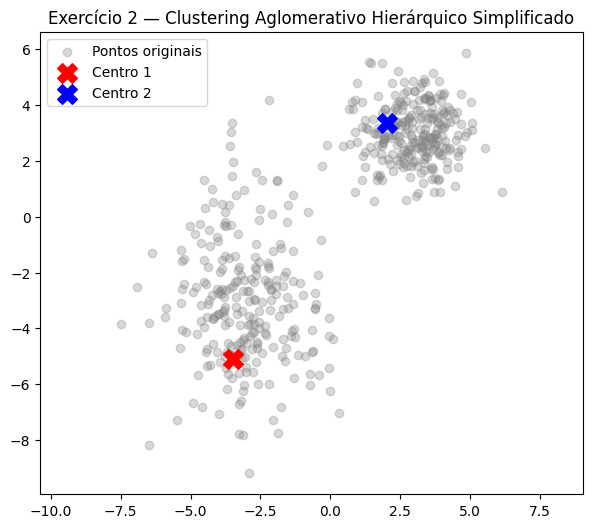

In [22]:
historico = []
while len(pontos) > 2:
    i, j = nearest_points(pontos)
    
    # calcular média dos dois pontos mais próximos
    media = [
        (pontos[i][0] + pontos[j][0]) / 2,
        (pontos[i][1] + pontos[j][1]) / 2
    ]
    
    
    # remover os dois pontos e adicionar o novo ponto médio
    pontos.pop(max(i, j))  # remover primeiro o de índice maior
    pontos.pop(min(i, j))
    pontos.append(media)

# Resultado final (dois pontos finais)
print("Restam apenas dois pontos:")
print(np.array(pontos))

# Plot
plt.figure(figsize=(7,6))
plt.scatter(c[0], c[1], color='gray', alpha=0.3, label='Pontos originais')

# Mostrar os dois pontos finais
plt.scatter(pontos[0][0], pontos[0][1], color='red', marker='X', s=200, label='Centro 1')
plt.scatter(pontos[1][0], pontos[1][1], color='blue', marker='X', s=200, label='Centro 2')
plt.axis("equal")
plt.title("Exercício 2 — Clustering Aglomerativo Hierárquico Simplificado")
plt.legend()
plt.show()

Comparando com o k-means observa mos que este metodo e significativamente mais ineficiente e mais demorado durante a execuçao, mesmo utilizando menos pontos. Tambem conseguimos concluir que a precisao tambem nao é tao boa.

## Exercício 3

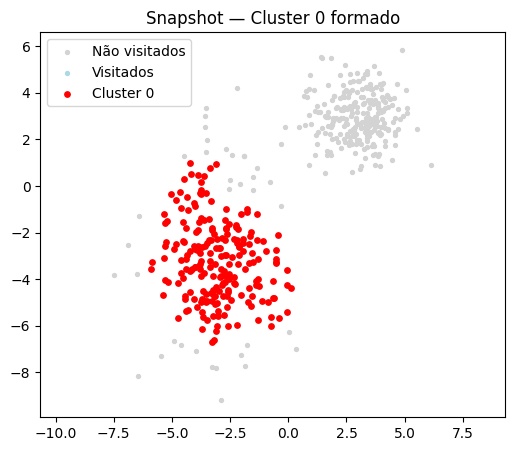

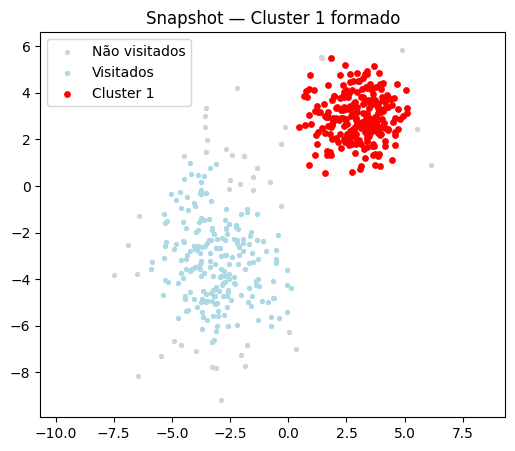

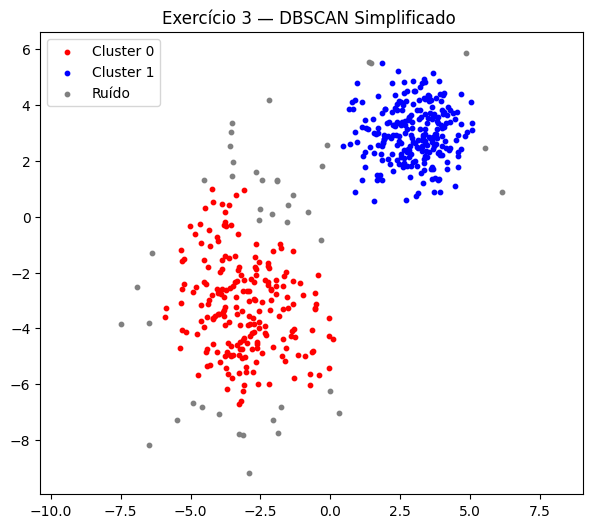

In [ ]:
# Convertendo para lista de pontos, cada linha é [x, y]
pontos = c.T.tolist()
n = len(pontos)

# Parâmetros do DBSCAN
eps = 0.8       # raio de vizinhança
minPts = 7     # número mínimo de vizinhos min

# Inicialização
visited = [False] * n      # lista de pontos visitados
cluster = [-1] * n         # cada ponto começa como ruído (-1)
cluster_id = 0             # identificador dos clusters que vai sendo aumentado

# Função que devolve a lista de vizinhos dentro do raio eps
def vizinhos(idx):
    lista = []
    for i in range(n):
        if distancia(pontos[idx], pontos[i]) < eps:
            lista.append(i)
    return lista


# Algoritmo principal do DBSCAN

for i in range(n):
    # Ignora o ponto se já foi visitado
    if visited[i]:
        continue

    visited[i] = True
    neigh = vizinhos(i)  # encontra os vizinhos do ponto i

    # Se o ponto tem poucos vizinhos, é considerado ruído
    if len(neigh) < minPts:
        cluster[i] = -1
        continue

    # Caso contrário, começa um novo cluster
    cluster[i] = cluster_id
    expand = list(neigh)  # lista com os pontos que vão ser verificados

    # Expansão do cluster
    while expand:
        p = expand.pop()  # retira o último ponto da lista
        if not visited[p]:
            visited[p] = True
            neigh2 = vizinhos(p)
            # Se este ponto também for “denso”, adiciona os seus vizinhos
            if len(neigh2) >= minPts:
                expand.extend(neigh2)
        # Se o ponto estava como ruído, passa a fazer parte do cluster
        if cluster[p] == -1:
            cluster[p] = cluster_id

    # Gráfico intermédio para mostrar o progresso
    plt.figure(figsize=(6,5))

    # Pontos ainda não visitados
    nao_visitados = [pontos[k] for k in range(n) if not visited[k]]
    if nao_visitados:
        plt.scatter([p[0] for p in nao_visitados],
                    [p[1] for p in nao_visitados],
                    color='lightgray', s=8, label="Não visitados")

    # Pontos que já foram visitados
    visitados = [pontos[k] for k in range(n) if visited[k]]
    if visitados:
        plt.scatter([p[0] for p in visitados],
                    [p[1] for p in visitados],
                    color='lightblue', s=8, label="Visitados")

    # Pontos que pertencem ao cluster atual
    atual = [pontos[k] for k in range(n) if cluster[k] == cluster_id]
    if atual:
        plt.scatter([p[0] for p in atual],
                    [p[1] for p in atual],
                    color='red', s=15, label=f"Cluster {cluster_id}")

    plt.title(f"Snapshot — Cluster {cluster_id} formado")
    plt.axis("equal")
    plt.legend()
    plt.show()

    # Passa ao próximo cluster
    cluster_id += 1


# Resultado final do DBSCAN

plt.figure(figsize=(7,6))
cores = ["red", "blue", "green", "orange", "purple", "brown"]

# Desenha cada cluster com uma cor diferente
for cid in range(cluster_id):
    grupo = [pontos[k] for k in range(n) if cluster[k] == cid]
    if grupo:
        plt.scatter([p[0] for p in grupo],
                    [p[1] for p in grupo],
                    color=cores[cid % len(cores)], s=10, label=f"Cluster {cid}")

# Mostra os pontos classificados como ruído
ruido = [pontos[k] for k in range(n) if cluster[k] == -1]
if ruido:
    plt.scatter([p[0] for p in ruido],
                [p[1] for p in ruido],
                color='gray', s=10, label="Ruído")

plt.axis("equal")
plt.title("Exercício 3 — DBSCAN")
plt.legend()
plt.show()
